In [3]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sales_data=pd.read_csv(r"C:\\Users\\Pranjal\Desktop\data\supermarket_sales - Sheet1.csv")
sales_data.head(50)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


TASK 1

In [9]:
y = sales_data['Rating']
features = ['Product line', 'Unit price','Quantity','Tax 5%','Customer type','City']
X = sales_data[features]
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state = 1)
train_x= pd.get_dummies(train_x)
train_y= pd.get_dummies(train_y)
test_x= pd.get_dummies(test_x)
test_y= pd.get_dummies(test_y)
train_x.head()

,Unit price,Quantity,Tax 5%,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Customer type_Member,Customer type_Normal,City_Mandalay,City_Naypyitaw,City_Yangon
298,60.01,4,12.0020,0,0,0,0,1,0,1,0,0,0,1
160,43.18,8,17.2720,0,0,1,0,0,0,0,1,0,1,0
268,70.74,4,14.1480,0,0,0,0,1,0,1,0,0,0,1
658,27.93,5,6.9825,0,0,0,0,0,1,1,0,0,0,1
996,97.38,10,48.6900,0,0,0,0,1,0,0,1,1,0,0


In [11]:
leaf_model = RandomForestRegressor(random_state = 1)
leaf_model.fit(train_x,train_y)
y_pred= leaf_model.predict(test_x)

In [14]:
mean_error = mean_absolute_error(test_y,y_pred)
print('The Mean Absolute Error is : {}'.format(mean_error))

The Mean Absolute Error is : 0.032192786885245864


Task 2

In [18]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
sales_data['Branch']= label_encoder.fit_transform(sales_data['Branch'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [23]:
features=['gross income','Branch']
x=sales_data[features]
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(x)

In [24]:
y_predicted

array([0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2,
       1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2,
       0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,

Task 3

In [34]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
sales_data['City']= label_encoder.fit_transform(sales_data['City'])
sales_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,1,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,0,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,2,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,2,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [41]:
column_1 = sales_data['City']
column_2 = sales_data['gross income']
correlation = column_2.corr(column_1)

In [42]:
correlation

-0.01281193273791786

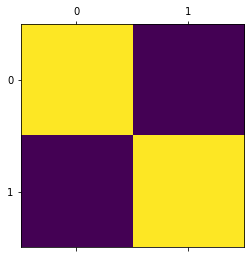

In [43]:
features=['City','gross income']
dataframe=sales_data[features]
import matplotlib.pyplot as plt
plt.matshow(dataframe.corr())
plt.show()


Task 4

In [54]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
sales_data['Customer type']= label_encoder.fit_transform(sales_data['Customer type'])
sales_data['Gender']=label_encoder.fit_transform(sales_data['Gender'])
sales_data['Product line']= label_encoder.fit_transform(sales_data['Product line'])
sales_data['Payment']=label_encoder.fit_transform(sales_data['Payment'])
sales_data['Invoice ID']=label_encoder.fit_transform(sales_data['Invoice ID'])
sales_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,1/29/2019,13:46,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,3/2/2019,17:16,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,2/9/2019,13:22,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,2/22/2019,15:33,0,65.82,4.761905,3.2910,4.1


In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
faetures=['Invoice ID','Branch',	'City',	'Customer type','Product line','Unit price','Quantity','Tax 5%','Payment','cogs','gross margin percentage','gross income','Rating']
X=sales_data[features]
y=sales_data[['Gender']]
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[101  55]
 [ 77  67]]
              precision    recall  f1-score   support

           0       0.57      0.65      0.60       156
           1       0.55      0.47      0.50       144

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.55       300
weighted avg       0.56      0.56      0.56       300

Accuracy Score: 0.56


C:\Users\Pranjal\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Task 5

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
faetures=['Invoice ID','Branch',	'City',	'Gender','Product line','Unit price','Quantity','Tax 5%','Payment','cogs','gross margin percentage','gross income','Rating']
X=sales_data[features]
y=sales_data[['Customer type']]
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[89 63]
 [80 68]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.55       152
           1       0.52      0.46      0.49       148

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

Accuracy Score: 0.5233333333333333


C:\Users\Pranjal\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
